# Some studies about Delta-z effect


### Nov 2020, JAH

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [5]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes

In [6]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri Nov 13 10:46:37 2020


### Load data

In [7]:
def get_filename(run_number):
    datadir    = f"/data_extra2/jrenner/analysis/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/{run_number}' + f'/hdf5/cdst/trigger2/cdst_combined_{run_number}' + '.h5'
    return filename

In [9]:
runs      = [8182, 8183, 8184]
filenames = [get_filename(run) for run in runs]
dds       = [bes.get_df_zeffect(filename) for filename in filenames]

In [16]:
from functools import reduce

dd = dds[0].append(dds[1], ignore_index = True)
dd = dd    .append(dds[2], ignore_index = True)

In [18]:
dd['S2eq']      = dd['S2e']/dd['S2q']
dd['blob1_eta'] = (dd['blob1_z'] - dd['z_min'])/dd['dz_track']
dd['blob2_eta'] = (dd['blob2_z'] - dd['z_min'])/dd['dz_track']

print(len(dd))
print(list(dd.columns))

3204576
['event', 'trackID', 'energy', 'length', 'numb_of_voxels', 'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min', 'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave', 'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y', 'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y', 'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'dz_track', 'enecor', 'time', 'nS2', 'S1e', 'S2e', 'S2q', 'Nsipm', 'evt_energy', 'evt_ntrks', 'evt_nhits', 'S2eq', 'blob1_eta', 'blob2_eta']


In [31]:
ranges                   = bes.get_ranges()
ranges['eblob2.soft']    = (0.2, 1.)
ranges['nS2.one']        = (0.5, 1.5)
ranges['S2e']            = (2.5e5, 1e8)
ranges['enecor.ds.hard'] = (1.630, 1.700)
selections   = bes.get_selections(dd, ranges)
selections['fidutial'] = selections.logical_and('numb_of_tracks.one', 'z_min', 'z_max', 'r_max', 'energy', 
                                                'nS2.one', 'S2e')
print(list(selections.keys()))

['numb_of_tracks.one', 'nS2', 'energy', 'energy.cs', 'energy.ds', 'energy.ph', 'enecor.cs', 'enecor.ds', 'enecor.ph', 'z_min', 'z_max', 'r_max', 'dz_track.cs', 'dz_track.ds', 'dz_track.ph', 'eblob2.soft', 'nS2.one', 'S2e', 'enecor.ds.hard', 'fidutial']


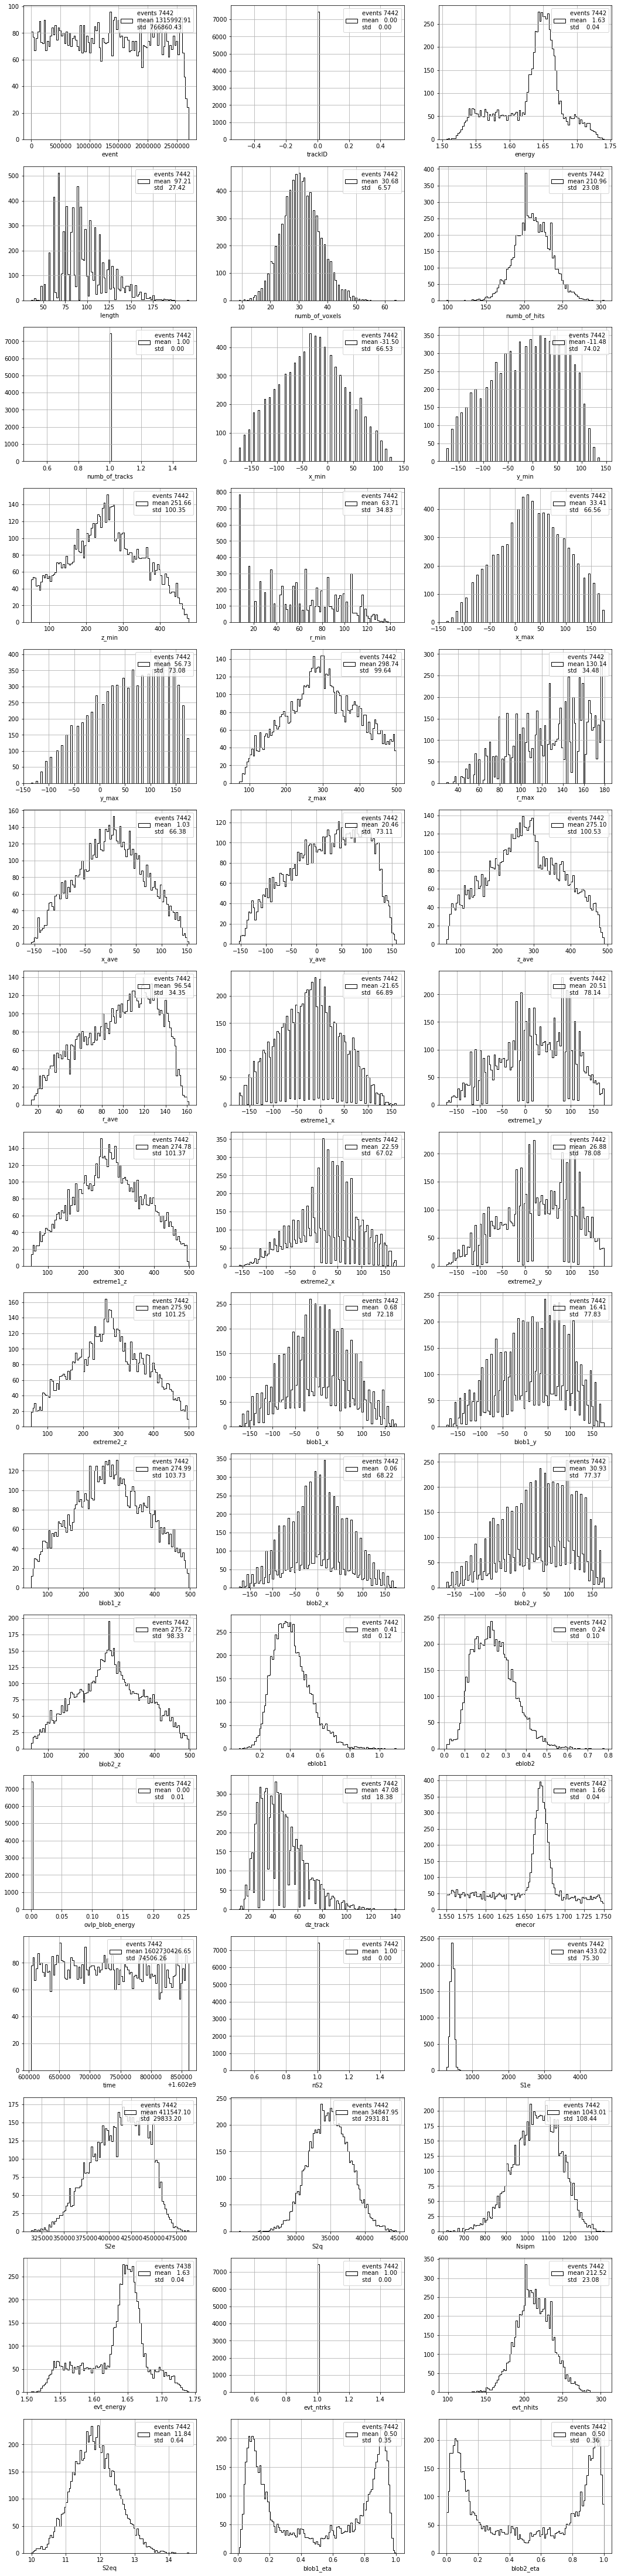

In [32]:
xsel = selections.logical_and('fidutial', 'enecor.ds')
pltext.plt_inspect_df(dd[xsel], ncolumns = 3)

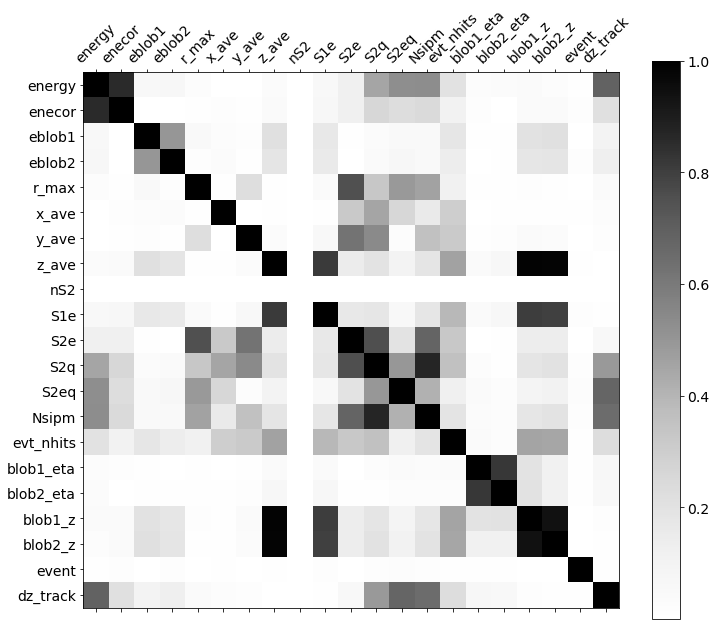

In [33]:
xsel = selections.logical_and('fidutial', 'enecor.ds.hard', 'eblob2.soft')

labels = ['energy', 'enecor', 'eblob1', 'eblob2', 
          'r_max', 'x_ave', 'y_ave', 'z_ave',
          'nS2', 'S1e', 'S2e', 'S2q', 'S2eq', 'Nsipm', 'evt_nhits',
          'blob1_eta', 'blob2_eta',
          'blob1_z', 'blob2_z', 'event', 'dz_track']

pltext.corrmatrix(dd[xsel], labels)

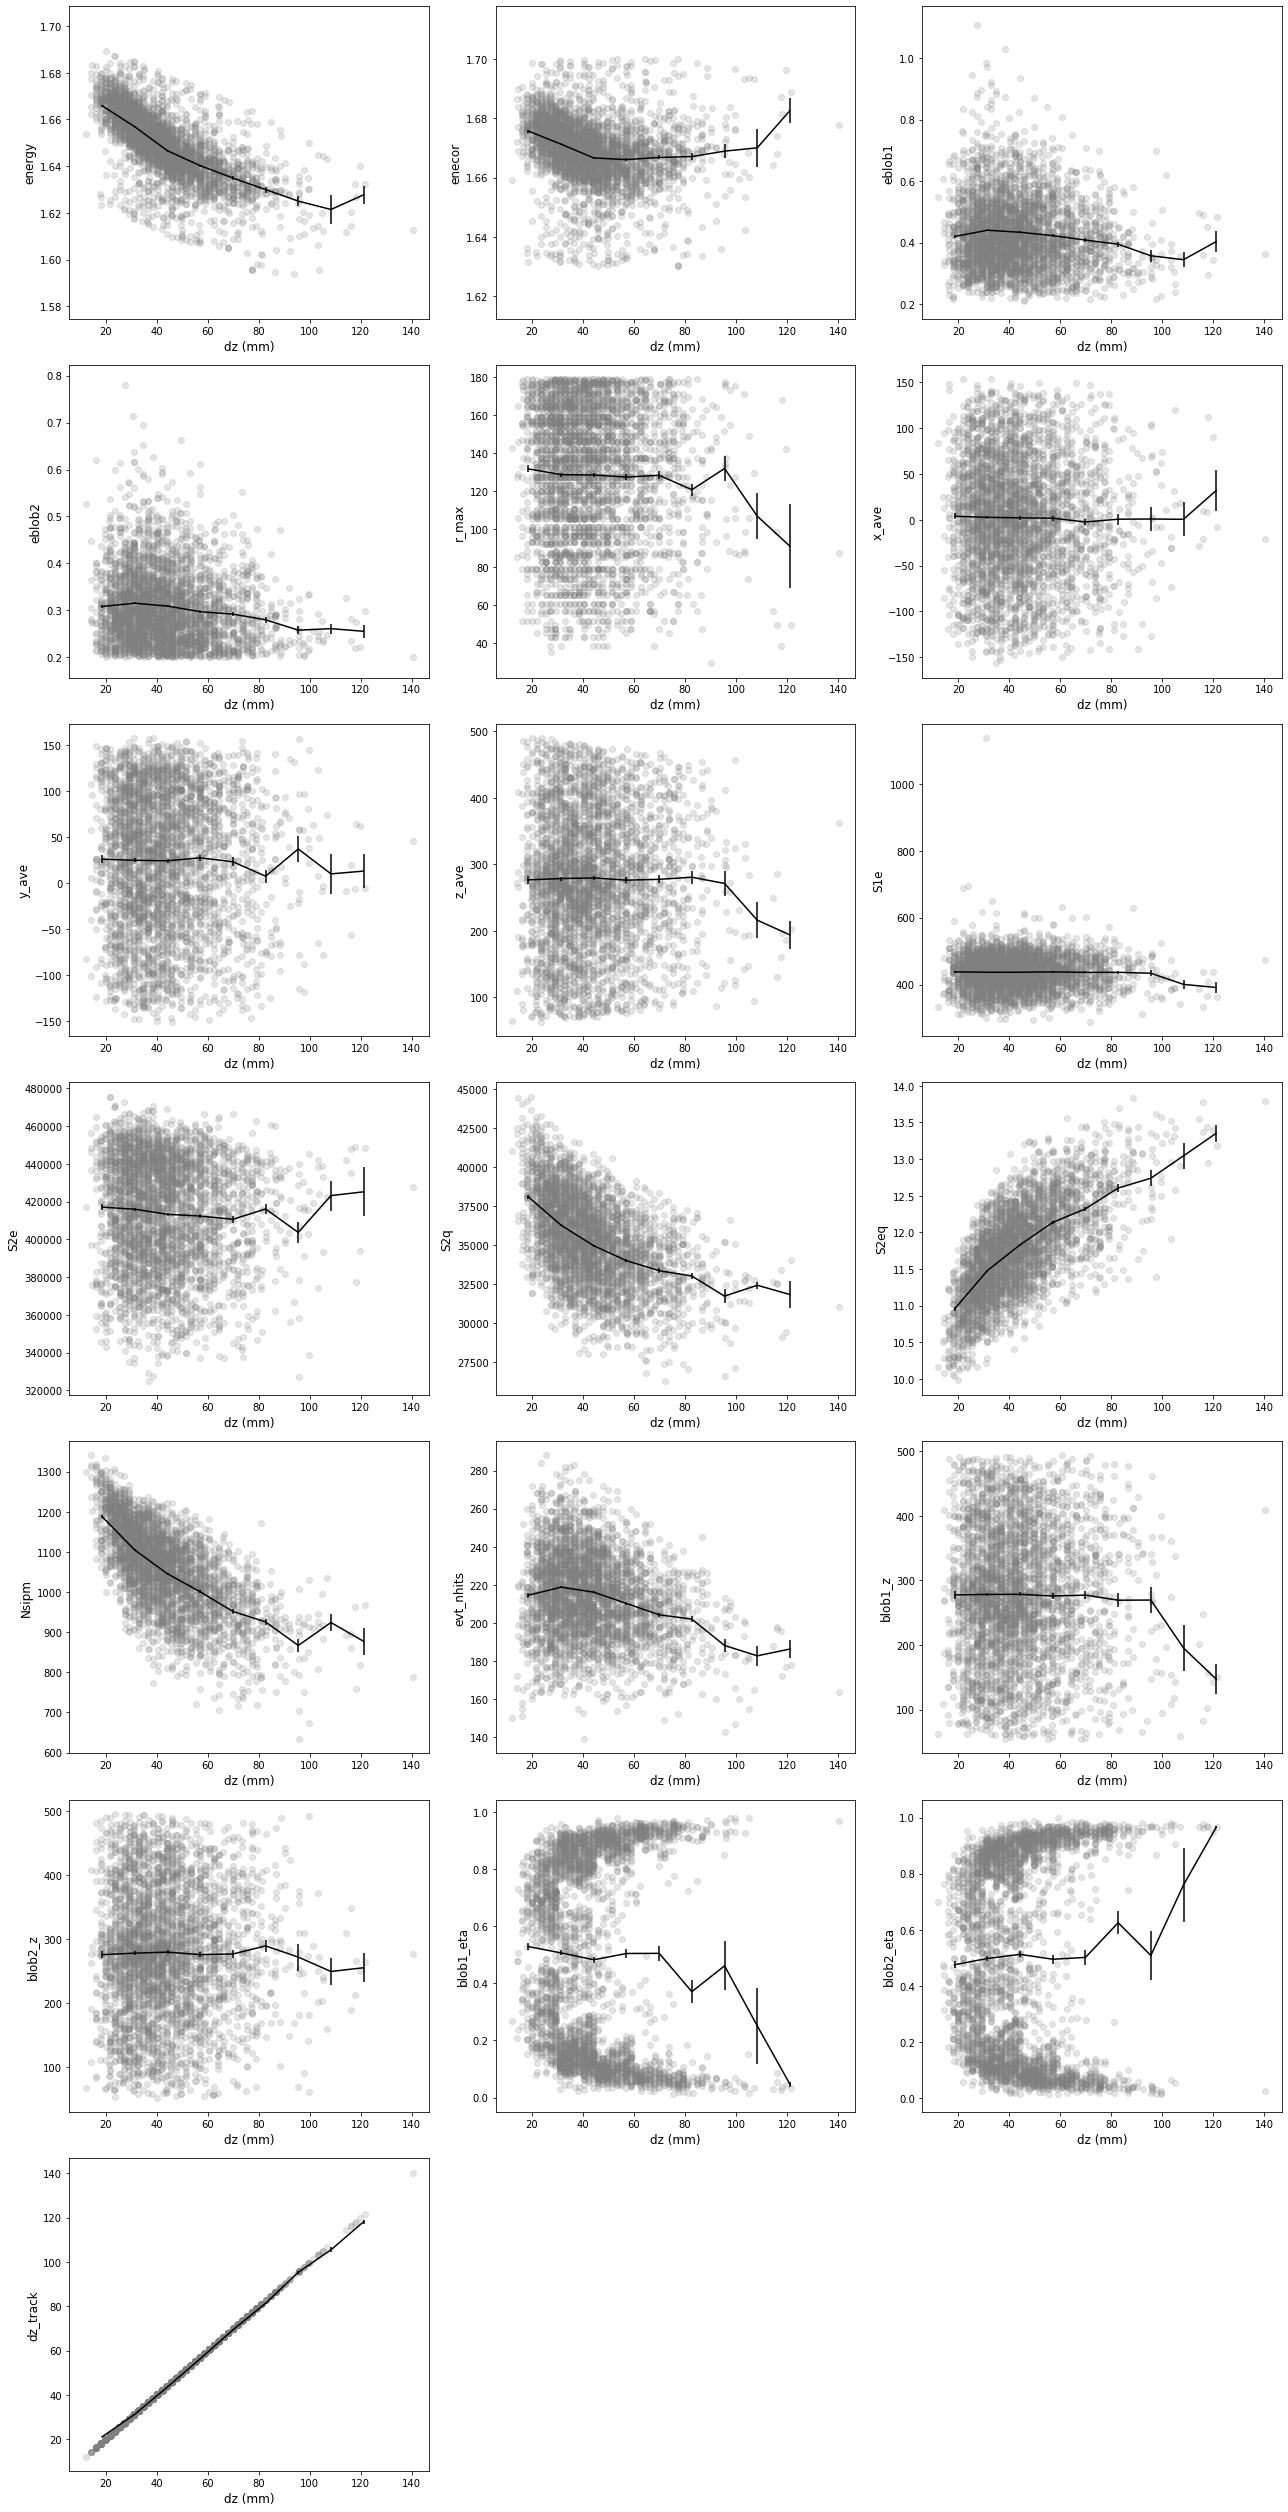

In [42]:
labels = ['energy', 'enecor', 'eblob1', 'eblob2', 
          'r_max', 'x_ave', 'y_ave', 'z_ave',
          'S1e', 'S2e', 'S2q', 'S2eq', 'Nsipm', 'evt_nhits',
          'blob1_z', 'blob2_z', 'blob1_eta', 'blob2_eta', 'dz_track']

xsel = selections.logical_and('fidutial', 'enecor.ds.hard', 'eblob2.soft')
#xsel = selections.logical_and('fidutial', 'enecor.cs')

subplot = pltext.canvas(len(labels), 3)
for i, label in enumerate(labels):
    subplot(i + 1)
    pltext.hpscatter(dd[xsel].dz_track, dd[xsel][label], alpha = 0.2, c = 'grey')
    plt.xlabel('dz (mm)', fontsize = 12); plt.ylabel(label, fontsize = 12);
plt.tight_layout()

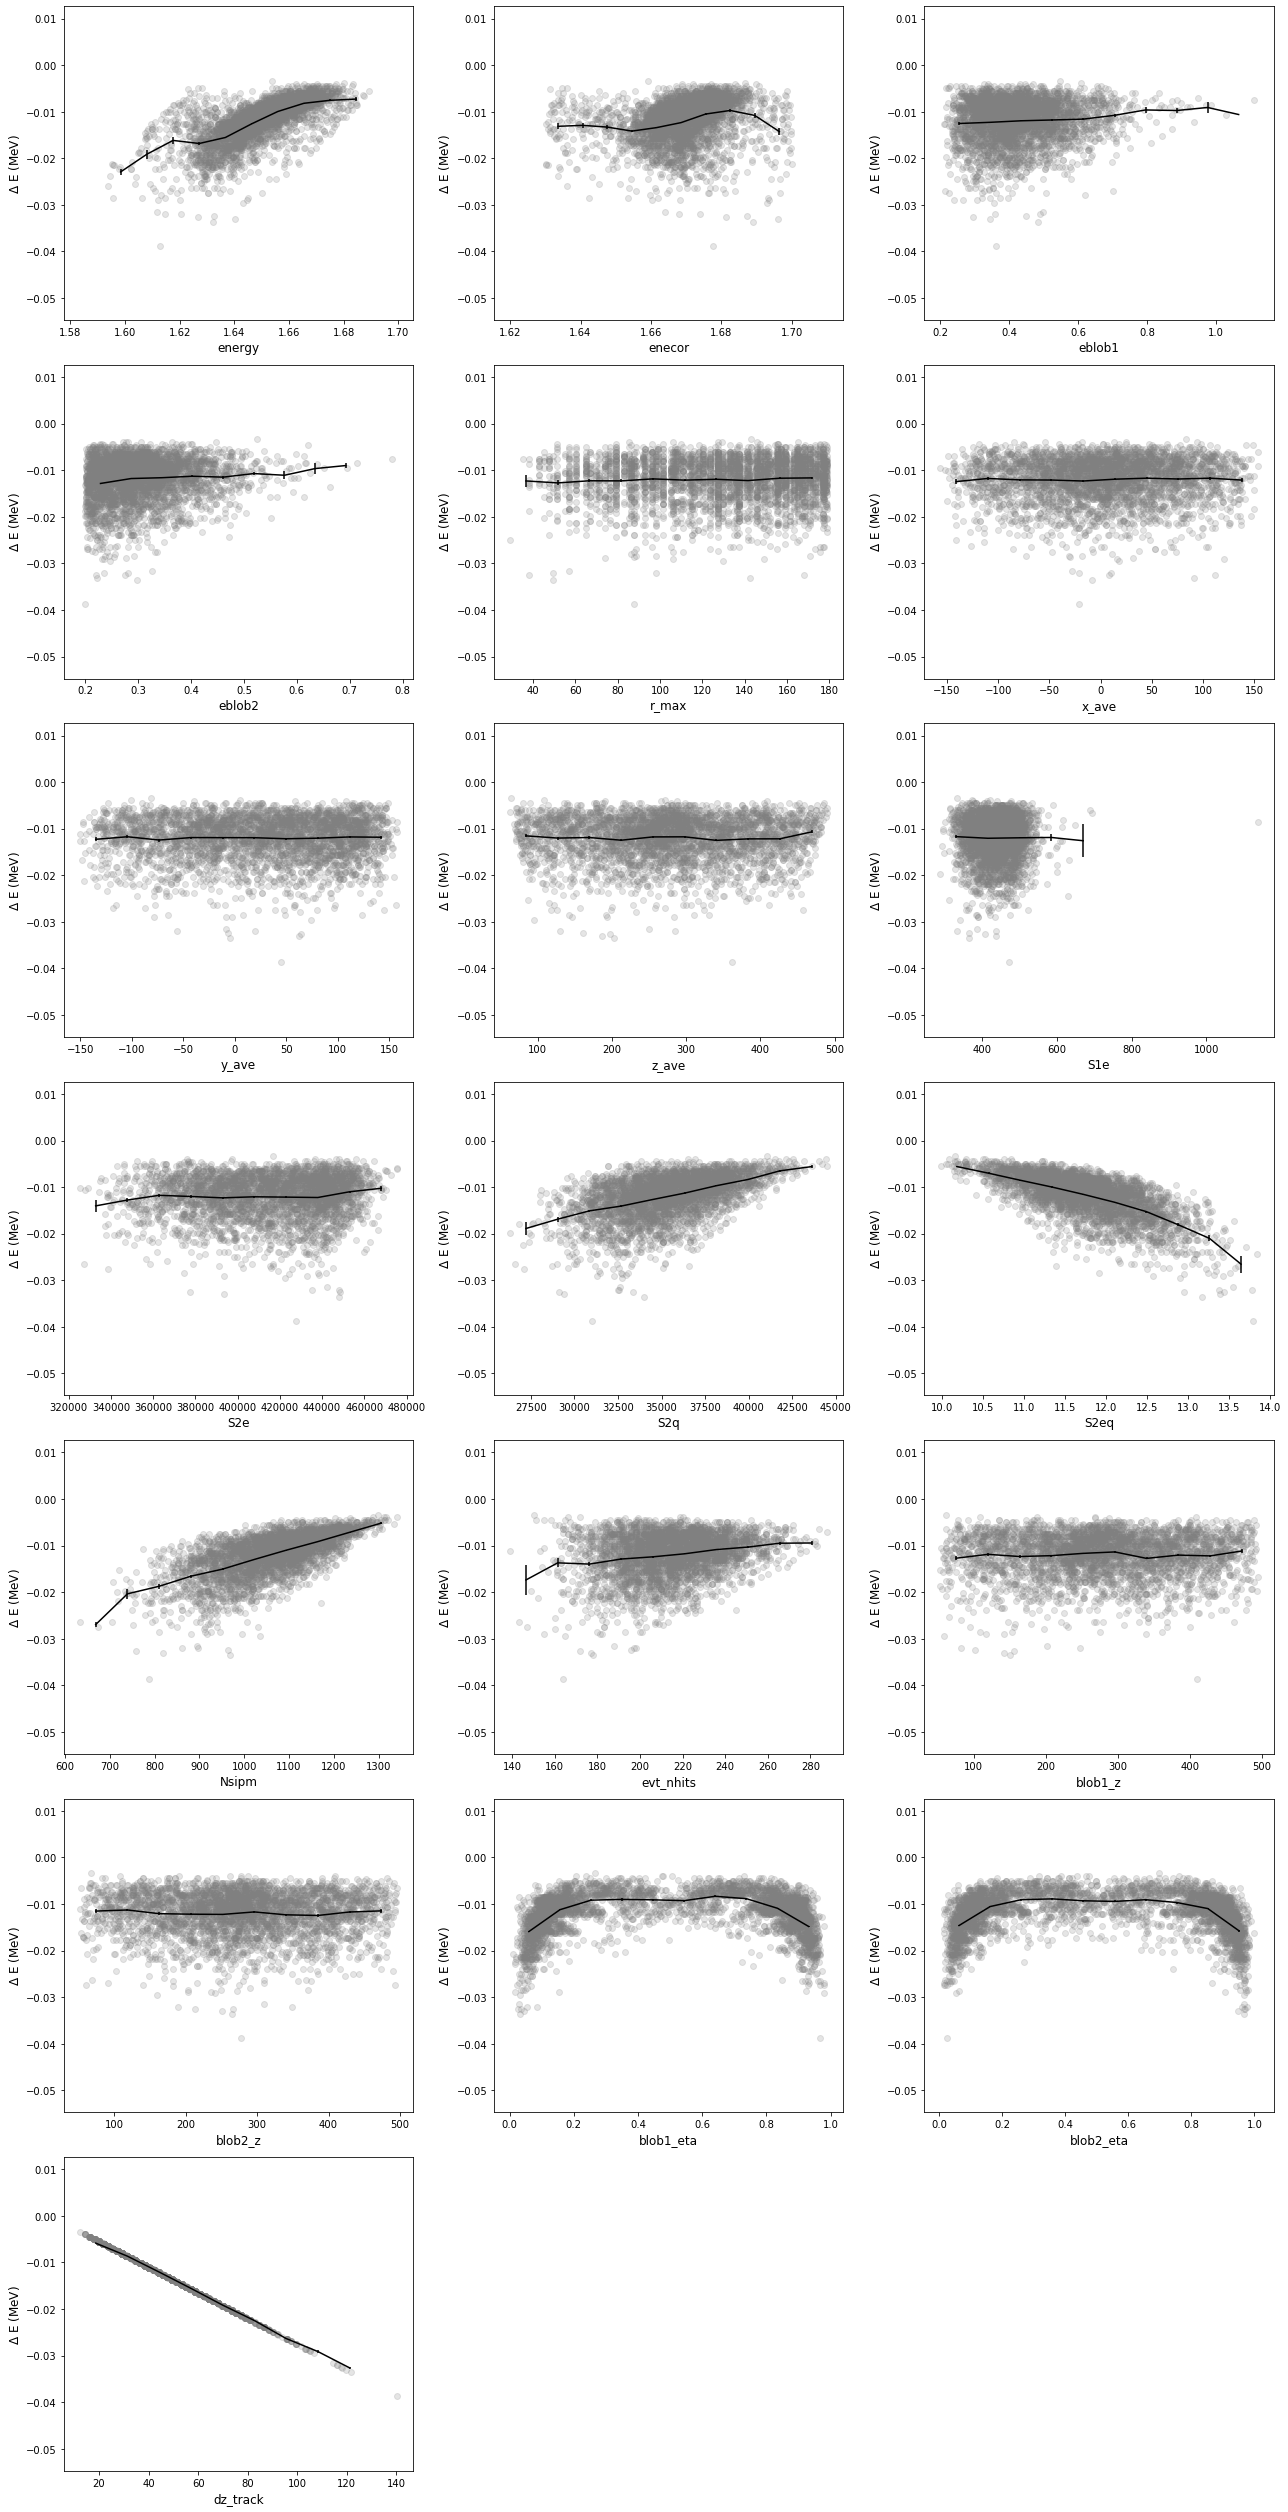

In [44]:
subplot = pltext.canvas(len(labels), 3)
for i, label in enumerate(labels):
    subplot(i + 1)
    pltext.hpscatter(dd[xsel][label], (dd[xsel]['energy']/dd[xsel].enecor-1.), alpha = 0.2, c = 'grey')
    plt.ylabel(r'$\Delta$ E (MeV)', fontsize = 12); plt.xlabel(label, fontsize = 12);
plt.tight_layout()